In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

### Load Data

In [2]:
images_list = np.load('./images.npy')
labels_list = np.load('./labels.npy')

### InceptionV3

In [3]:
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.model_selection import train_test_split

In [4]:
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best performance on the validation set

In [5]:
# X = preprocess_input(images_list)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images_list, labels_list, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [7]:
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=(112, 112, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Example dense layer
predictions = Dense(10, activation='softmax')(x)  # Example output layer

In [8]:
model = models.Model(inputs=base_model.input, outputs=predictions)

In [9]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 56, 56, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 56, 56, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 56, 56, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 56, 56, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 56, 56, 32)        128   

In [10]:
import matplotlib.pyplot as plt

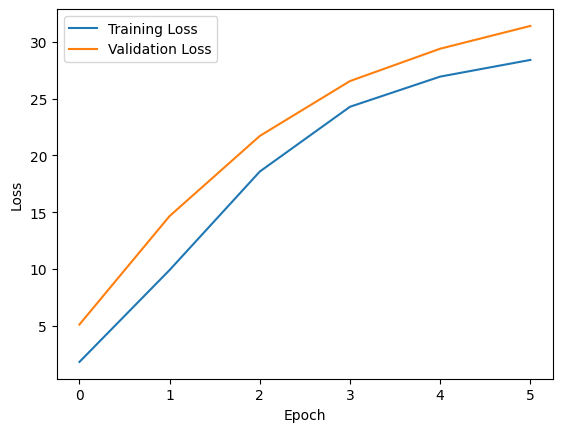

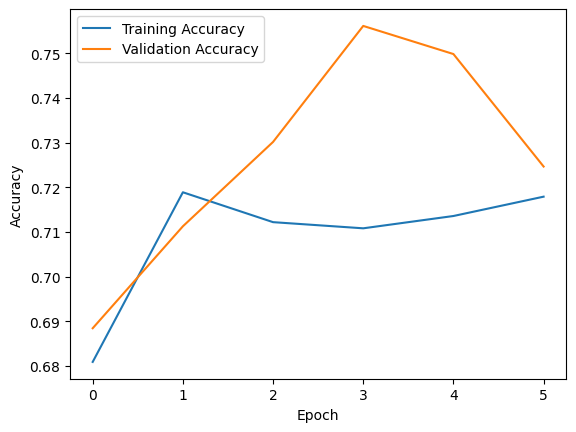

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
y_pred_prob = model.predict(X_test)

50/50 [==============================] - 8s 140ms/step


In [13]:
y_pred_binary_05 = (y_pred_prob >= 0.5).astype(int)
y_pred_binary_04 = (y_pred_prob >= 0.4).astype(int)
y_pred_binary_03 = (y_pred_prob >= 0.3).astype(int)

In [14]:
print(f'Acc at 0.5 threshold: {accuracy_score(y_test, y_pred_binary_05)}')
print(f'Acc at 0.4 threshold: {accuracy_score(y_test, y_pred_binary_04)}')
print(f'Acc at 0.3 threshold: {accuracy_score(y_test, y_pred_binary_03)}')

Acc at 0.5 threshold: 0.5556954059156702
Acc at 0.4 threshold: 0.6003775959723097
Acc at 0.3 threshold: 0.6299559471365639
